## This is the Covid-19 prediction in India using moving average and exponential curve method.

#### The data set used in this project is from 30th january 2020 to 19th april 2020.
#### There are some plots as well to show the basic relationships between the variables of this particular data.
#### At the end both (moving avg curve / Exponential curve) shows the rate of confirmed cases in India.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('date_wise_data.csv')
pd.set_option('display.max_rows',10)
data1 = data.drop('Unnamed: 0',axis=1)
data1

,Date,Confirmed,Deaths,Cured,Active
0,2020-01-30,1,0,0,1
1,2020-01-31,1,0,0,1
2,2020-02-01,2,0,0,2
3,2020-02-02,3,0,0,3
4,2020-02-03,3,0,0,3
...,...,...,...,...,...
76,2020-04-15,11933,392,1344,10197
77,2020-04-16,12759,420,1515,10824
78,2020-04-17,13835,452,1767,11616
79,2020-04-18,14792,488,2015,12289


In [5]:
data1.keys()

Index(['Date', 'Confirmed', 'Deaths', 'Cured', 'Active'], dtype='object')

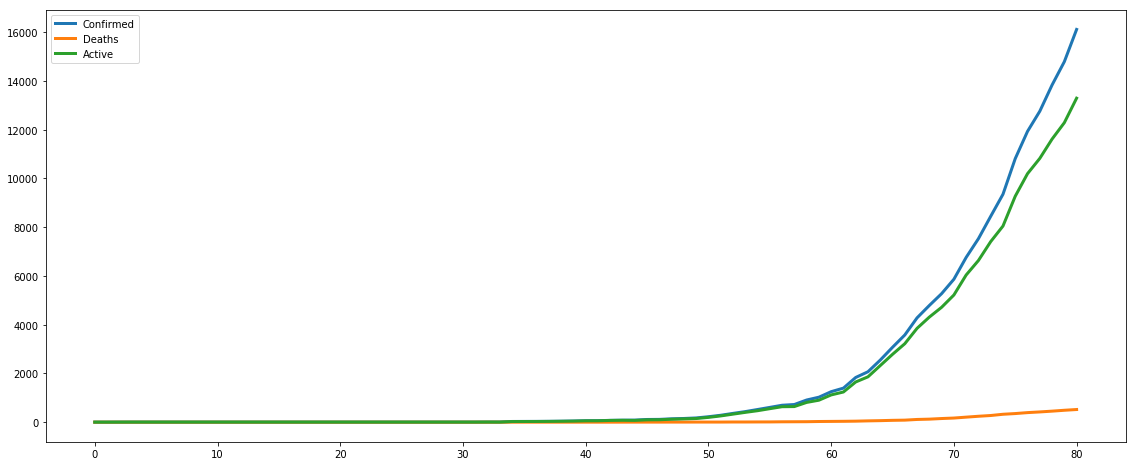

In [6]:
x = data['Confirmed']
y = data['Deaths']
z = data['Active']

fig = plt.figure(figsize=(15,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(x,lw=3)
axes.plot(y,lw=3)
axes.plot(z,lw=3)
axes.legend()

In [7]:
import seaborn as sns

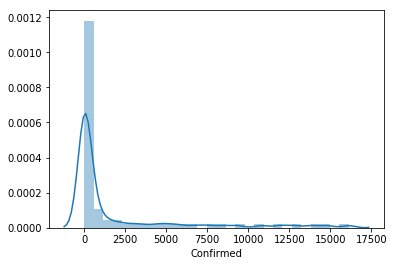

In [8]:
d = sns.distplot(data['Confirmed'])
d

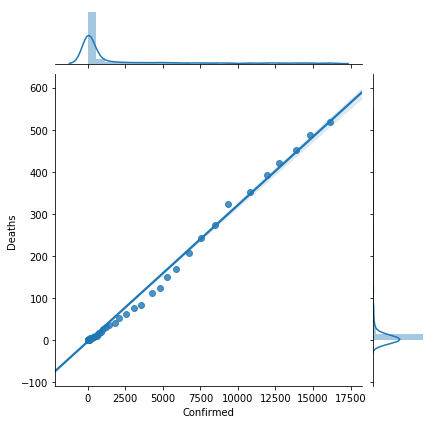

In [9]:
sns.jointplot(x=data['Confirmed'],y=data['Deaths'],data=data,kind='reg')

In [10]:
d1 = data.drop('Unnamed: 0',axis=1)
d1

,Date,Confirmed,Deaths,Cured,Active
0,2020-01-30,1,0,0,1
1,2020-01-31,1,0,0,1
2,2020-02-01,2,0,0,2
3,2020-02-02,3,0,0,3
4,2020-02-03,3,0,0,3
...,...,...,...,...,...
76,2020-04-15,11933,392,1344,10197
77,2020-04-16,12759,420,1515,10824
78,2020-04-17,13835,452,1767,11616
79,2020-04-18,14792,488,2015,12289


In [11]:
d2 = d1.corr()
d2

,Confirmed,Deaths,Cured,Active
Confirmed,1.000000,0.997744,0.980955,0.999571
Deaths,0.997744,1.000000,0.985621,0.996157
Cured,0.980955,0.985621,1.000000,0.974861
Active,0.999571,0.996157,0.974861,1.000000


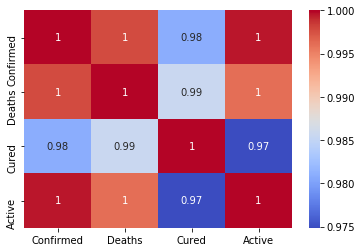

In [12]:
sns.heatmap(d2,annot=True,cmap='coolwarm')

In [13]:
df = pd.read_csv('confirmed.csv')
df

,Date,Confirmed
0,30/01/2020,1
1,31/01/2020,1
2,01/02/2020,2
3,02/02/2020,3
4,03/02/2020,3
...,...,...
76,15/04/2020,11933
77,16/04/2020,12759
78,17/04/2020,13835
79,18/04/2020,14792


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
Date         81 non-null object
Confirmed    81 non-null int64
dtypes: int64(1), object(1)
memory usage: 1012.0+ bytes


In [15]:
df.describe()

,Confirmed
count,81.000000
mean,1918.790123
std,3877.055647
min,1.000000
25%,3.000000
50%,58.000000
75%,1251.000000
max,16116.000000


In [16]:
df['Moving_avg'] = df['Confirmed'].rolling(window = 12).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df[['Confirmed', 'Moving_avg']]

,Confirmed,Moving_avg
0,1,nan
1,1,nan
2,2,nan
3,3,nan
4,3,nan
...,...,...
76,11933,6025.75
77,12759,6807.92
78,13835,7615.17
79,14792,8470.00


In [17]:
df=df.fillna(0)
df

,Date,Confirmed,Moving_avg
0,30/01/2020,1,0.00
1,31/01/2020,1,0.00
2,01/02/2020,2,0.00
3,02/02/2020,3,0.00
4,03/02/2020,3,0.00
...,...,...,...
76,15/04/2020,11933,6025.75
77,16/04/2020,12759,6807.92
78,17/04/2020,13835,7615.17
79,18/04/2020,14792,8470.00


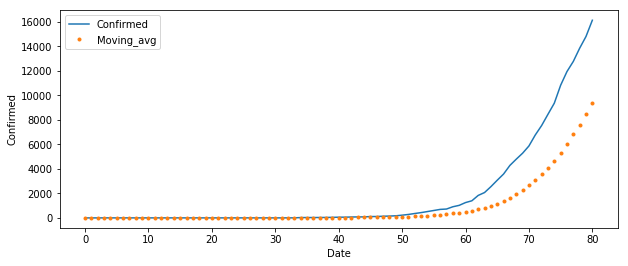

In [18]:
plt.figure(figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.plot(df["Confirmed"]);
plt.plot(df["Moving_avg"], '.');
plt.legend();

In [19]:
import numpy as np

In [20]:
from sklearn.metrics import mean_absolute_error
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return mean_absolute_error(y_true, y_pred)

get_mape(df["Confirmed"].values,df["Moving_avg"].values)

973.6121399176955

In [21]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df["Confirmed"].values,df["Moving_avg"].values))

2066.7221416829348

In [22]:
df['expo_mean'] = df["Confirmed"].ewm( alpha = 0.2 ).mean()
df.tail()

,Date,Confirmed,Moving_avg,expo_mean
76,15/04/2020,11933,6025.75,8278.50
77,16/04/2020,12759,6807.92,9174.60
78,17/04/2020,13835,7615.17,10106.68
79,18/04/2020,14792,8470.00,11043.74
80,19/04/2020,16116,9345.92,12058.19


In [23]:
get_mape(df["Confirmed"].values,df["expo_mean"].values)

595.3757164692282

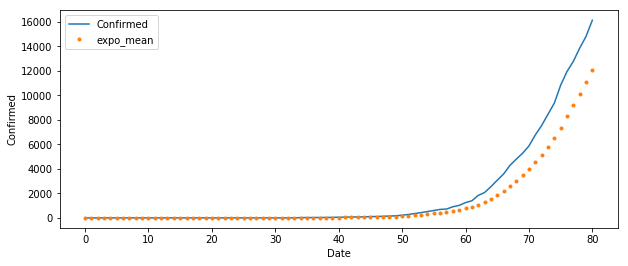

In [24]:
plt.figure( figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.plot(df['Confirmed']);
plt.plot(df['expo_mean'], '.' );
plt.legend();